In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

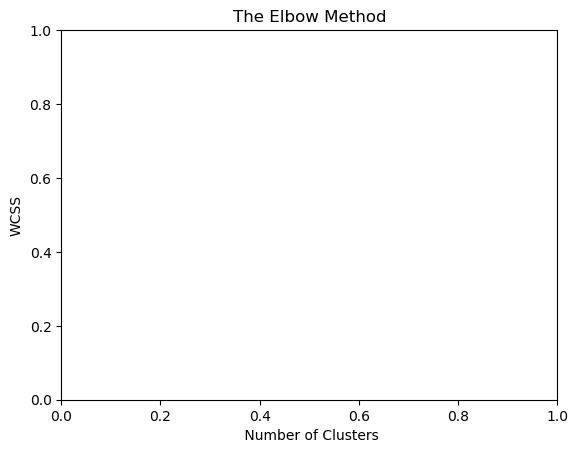

In [4]:
from sklearn.cluster import MeanShift
plt.title('The Elbow Method')
plt.xlabel(' Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
from sklearn.cluster import MeanShift

In [6]:
af =MeanShift ( bandwidth=1, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None)
label=af.fit_predict(X)

C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\sklearn

In [7]:
#To add a extra column for cluster group
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
supervised['cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,171
1,2,Male,21,15,81,170
2,3,Female,20,16,6,169
3,4,Female,23,16,77,168
4,5,Female,31,17,40,167
...,...,...,...,...,...,...
195,196,Female,35,120,79,27
196,197,Female,45,126,28,26
197,198,Male,32,126,74,25
198,199,Male,32,137,18,24


In [9]:
supervised.to_csv("cluster.csv",index=False)
centroids=af.cluster_centers_
centroids

array([[ 78.        ,  89.        ],
       [ 61.66666667,  41.66666667],
       [ 60.33333333,  49.33333333],
       [ 54.        ,  54.        ],
       [ 54.        ,  52.        ],
       [ 54.        ,  47.        ],
       [ 47.66666667,  59.        ],
       [ 87.5       ,  13.        ],
       [ 78.        ,  16.5       ],
       [ 78.        ,   1.        ],
       [ 71.        ,  75.        ],
       [ 67.        ,  56.5       ],
       [ 63.5       ,  46.        ],
       [ 62.5       ,  48.        ],
       [ 62.        ,  55.5       ],
       [ 60.5       ,  42.        ],
       [ 54.        ,  41.5       ],
       [ 48.        ,  50.5       ],
       [ 48.        ,  47.5       ],
       [ 46.        ,  55.5       ],
       [ 42.5       ,  60.        ],
       [ 40.        ,  42.        ],
       [ 24.5       ,  73.        ],
       [137.        ,  83.        ],
       [137.        ,  18.        ],
       [126.        ,  74.        ],
       [126.        ,  28.        ],
 

In [7]:
#To add a extra column for cluster group
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
supervised.to_csv("cluster.csv",index=False)

In [11]:
supervised.columns[3]

'Annual Income (k$)'

In [12]:
supervised.columns[4]

'Spending Score (1-100)'

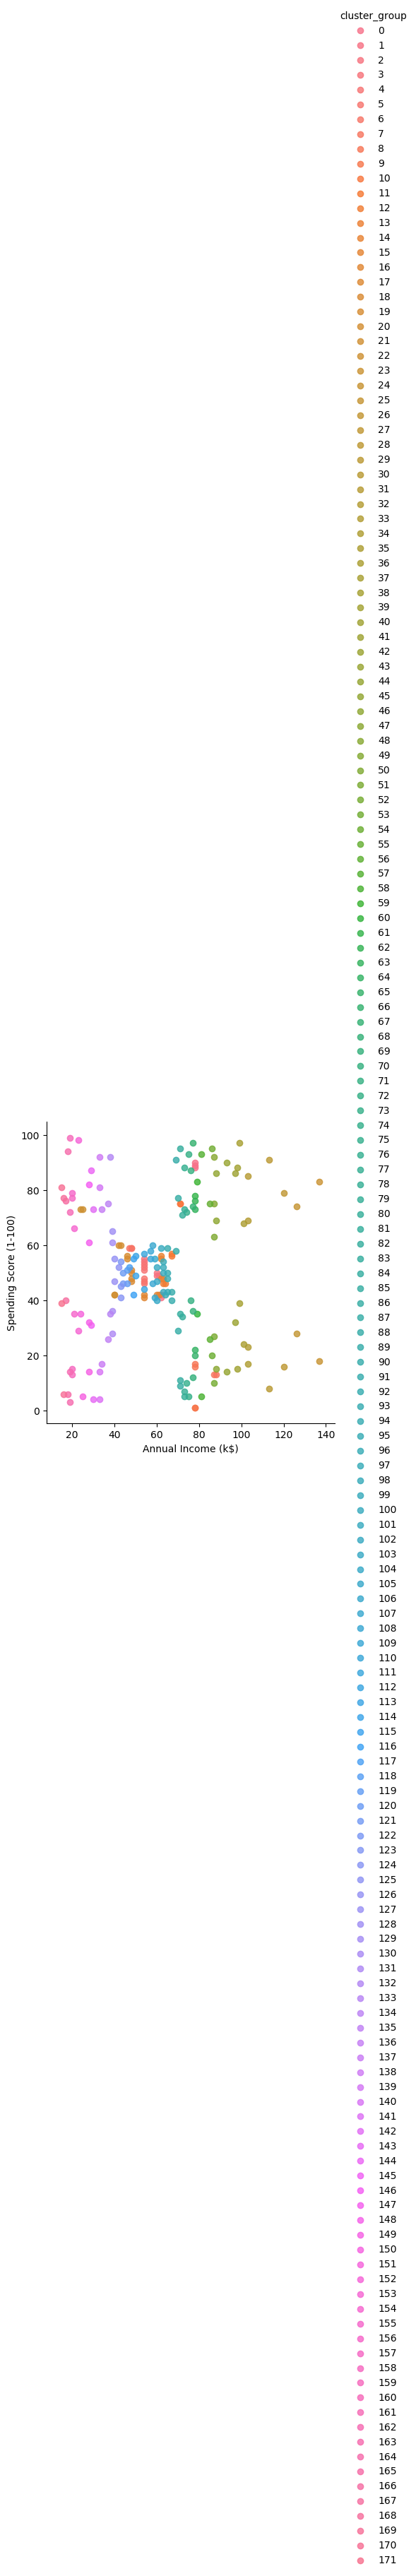

In [13]:
#seaborn for graphical use
import seaborn as sns
#sns.lmplot for graph,x axis is annual income ,y  axis is spending score ,hue is clustered column,fit_reg for fit_regression,legend for
#cluster colors and legend_out for cluster group name
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True)